# O que veremos
- Variável Aleatória
- Momentos
    - Esperânça
    - Variância
- Modelos de probabilidade discreta
- Modelos de probabilidade contínua

In [1]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Variável aleatória

Uma variável aleatória é uma função definida num espaço amostral, que assume valores reais.

**Exs.:**

- Moedas:

Seja X uma v.a. igual ao número de caras num lançamento de duas moedas. Dessa forma temos que:

|Espaço Amostral|Valores de X|
|:---:|:---:|
|KK|2|
|KC|1|
|CK|1|
|CC|0|

- Linha de produção:

Seja X a v.a. definida pela quantidade peças defeituosas entre as 3 retiradas da linha de produção para teste e averiguação

|Espaço Amostral|Valores de X|
|:---:|:---:|
|BBB|0|
|BBD|1|
|BDB|1|
|DBB|1|
|BDD|2|
|DBD|2|
|DDB|2|
|DDD|3|

- Outros
    - O número de veículos que passam por um posto de pedágio
    - O tempo de vida de um cliente da empresa
    - O volume de água numa represa num dado instante
    - O tempo de espera entre ligações numa central de telemarketing

A partir da definição da variável aleatória podemos verificar as probabilidades de cada um dos valores ocorrerem e a isso chamamos de **distribuição de probabilidade**

**Exs:**

- Moedas:

|Valores de X| Elementos amostrais | Probabilidade|
|:---:|:---:|:---:|
|2|KK|$\frac{1}{4}$|
|1|KC, CK|$\frac{1}{2}$|
|0|CC|$\frac{1}{4}$|

- Linha de produção:

Suponha que a Probabilidade de uma peça ser boa é de 0.9 e portanto de ser defeituosa é de 0.1, logo:

|Valores de X| Elementos amostrais | Probabilidade|
|:---:|:---:|:---:|
|0|BBB|$(0.9)^3$
|1|BBD, BDB, DBB|$3(0.9)^2(0.1)$
|2|BDD, DBD, DDB|$3(0.9)(0.1)^2$
|3|DDD|$(0.1)^3$


In [2]:
#random choice
elementos = ['B', 'D']
for _ in range(100):
    print(np.random.choice(elementos, 3, p=[0.9, 0.1]))

['B' 'B' 'B']
['B' 'B' 'B']
['D' 'B' 'D']
['B' 'B' 'B']
['D' 'D' 'B']
['B' 'B' 'B']
['B' 'B' 'B']
['B' 'B' 'B']
['B' 'B' 'B']
['B' 'B' 'B']
['B' 'B' 'B']
['B' 'B' 'B']
['B' 'B' 'B']
['B' 'D' 'B']
['B' 'B' 'B']
['D' 'B' 'B']
['B' 'B' 'D']
['B' 'B' 'B']
['B' 'B' 'B']
['B' 'B' 'B']
['D' 'B' 'B']
['D' 'B' 'B']
['B' 'B' 'B']
['B' 'B' 'D']
['B' 'B' 'B']
['B' 'B' 'B']
['B' 'B' 'B']
['B' 'B' 'B']
['B' 'B' 'B']
['B' 'B' 'B']
['B' 'B' 'B']
['B' 'B' 'B']
['B' 'B' 'B']
['B' 'B' 'D']
['B' 'D' 'B']
['B' 'B' 'B']
['B' 'B' 'D']
['B' 'B' 'B']
['B' 'B' 'D']
['B' 'B' 'B']
['D' 'D' 'B']
['B' 'B' 'B']
['B' 'D' 'B']
['B' 'B' 'B']
['B' 'D' 'B']
['D' 'B' 'B']
['B' 'B' 'D']
['B' 'B' 'B']
['B' 'B' 'B']
['B' 'B' 'B']
['B' 'B' 'D']
['B' 'B' 'B']
['B' 'B' 'D']
['B' 'B' 'B']
['B' 'B' 'B']
['B' 'B' 'B']
['B' 'B' 'B']
['B' 'B' 'B']
['B' 'B' 'B']
['D' 'B' 'B']
['B' 'B' 'B']
['B' 'B' 'B']
['B' 'D' 'B']
['B' 'B' 'B']
['B' 'B' 'B']
['B' 'B' 'B']
['B' 'B' 'B']
['B' 'B' 'B']
['B' 'B' 'D']
['B' 'B' 'B']
['B' 'B' 'B']
['B' '


- Número de lançamentos até o primeiro sucesso

Seja X uma v.a. que assume o valor da quantidade de n lançamentos de um dado até que o número 6 seja observado.

Aqui percebemos que $X \in \mathbb{N}_1^n$ e que

$$P(X = 1) = \dfrac{1}{6}$$

$$P(X = 2) = \dfrac{5}{6}\dfrac{1}{6}$$

$$P(X = 3) = \left(\dfrac{5}{6}\right)^2\dfrac{1}{6}$$

$$\cdots$$

$$P(X = n) = \left(\dfrac{5}{6}\right)^{n-1}\dfrac{1}{6}$$

Note que, além dos valores tabulados, é possível termos uma fórmula que nos dá exatamente a probabilidade para cada valor possível de X. A isso damos o nome de **função de probabilidade** ou ainda, mais especificamente para os casos contínuos, **função densidade de probabilidade**.

Além do valor pontual de probabilidade isso nos permite também a calcular a probabilidade de intervalo de valores.

**Ex.:**
- Moeda

$$P(X \geq 1) = P(\{X = 1\} \cup \{X = 2\}) = P(X = 1) + P(X = 2) = 0.5 + 0.25 = 0.75$$

- Lançamentos

$$P( 3 \leq X \leq 12) = \sum_{i=3}^{12} P(X = i) = \sum_{i=3}^{12}\left(\dfrac{5}{6}\right)^{i-1}\dfrac{1}{6}$$


Em termos gerais temos

Caso discreto:

$$P(a \leq X \leq b) = \sum_{i=a}^b P(X = i)$$

Caso contínuo:

$$P(a \leq X \leq b) = \int_a^b f(x)dx$$

**Ex.:** Imagine que você gerencie uma estação de telemarketing e deseja saber qual é a probabilidade de receber ligações com intervalos de até 10 segundos entre uma e outra, para conseguir dimensionar a quantidade de pessoas para alocar na sua operação. Para isso você começa a contabilizar o tempo que demora para chegar uma nova ligação e tem algo como a imagem abaixo:

<img src = "./imgs/tempo_entre_eventos.png" width = "50%"></img>



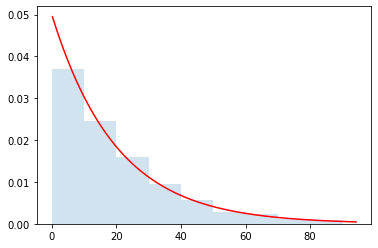

In [4]:
# Tempo entre observacoes
# Telemarketing, Sinistro de Carro, ...
lamb = 0.05 #taxa de ligacoes por segundo
scale = 1/lamb
exp = scipy.stats.expon
x = np.linspace(exp.ppf(0.01, scale = scale),
                exp.ppf(0.991, scale = scale),
                500)

plt.plot(x, exp.pdf(x, scale = scale),'r-')
plt.hist(exp.rvs(size=1000, scale = scale),
         bins = range(0,91,10),
         density=True,
         alpha=0.2)
plt.show()

In [5]:
# AUC
b = 10
a = 0

exp.cdf(b, scale=scale) - exp.cdf(a, scale=scale)

0.3934693402873666

O comando acima implementa a chamada **Função de Distribuição de Probabilidade**, também conhecida como **Função de Distribuição Acumulada**, que tem esse nome pois denota

$$F_X(x) = P(X <= x)$$

e, por consequência temos então que:

$$P(a \leq X \leq b) = \int_a^b f(x)dx = F_X(b) - F_X(a)$$

# Momentos
Momentos de uma função são medidas quantitativas a respeito da forma do gráfico dessa função. Em probabilidade temos 4 momentos principais:

- Primeiro Momento: **Esperança**
- Segundo Momento: **Variância**
- Terceiro Momento: **Assimetria**
- Quarto Momento: **Curtose**

## Esperança

Imagine que queremos apostar 1 real se as pessoas conhecem ou não um determinado filme, por exemplo [Ágora](https://pt.wikipedia.org/wiki/Ágora_(filme)). Vamos super que a gente faça uma pesquisa prévia e tenhamos a seguinte tabela de frequência:

||Conhecem o filme|Não conhecem o filme|
|---|:---:|:---:|
Freq. Abs.|37|176|
Probabilidade|0.17|0.83|
Prêmio|-1|1|

Se fizermos essa aposta perguntando para 100 pessoas diferentes, qual é o valor que eu espero ganhar (ou perder) ao final da última aposta?

Seja C: Conhecer o filme, podemos que a quantidade de perdas esperadas é igual a

$$P(C) = 0.17 \rightarrow 100*P(C) = 17 \rightarrow 17*-1 = -R\$17.00 $$

enquanto que a quantidade de ganhos esperados é de

$$P(C^c) = 0.83 \rightarrow 100*P(C^c) = 83 \rightarrow 83* 1 = R\$83.00 $$

Dessa maneira o nosso saldo esperado total seria de

$$100*17*-1 + 100*83*1 = R\$66.00$$

mas podemos ainda ver qual é o valor esperado médio a ser recebido por aposta dividindo pela quantidade de apostas feitas.

$$\dfrac{\color{red}{100}*0.17*-1 + \color{red}{100}*0.83*1}{\color{red}{100}} = R\$0.66$$

Ou seja, na média, esperamos receber 66 centavos por aposta. Podemos dizer então que **66 centavos é o Valor Esperado da aposta**

Notem ainda que o que fizemos foi uma média monderada de acordo com as probabilidades, ou em termos matemáticos:

$$E(X) = \sum_{x \in X}xP(X = x)$$

ou para casos contínuos como

$$E(X) = \int_{-\infty}^{\infty}xf(x)dx$$

Sendo uma média ponderada então poderíamos entender que, dado que $P(C) = 0.17$ é muito inferior a 0.83, a pessoa poderia querer inverter a aposta e tentar nos atrair pro golpe nos dando mais dinheiro, de acordo com a tabela abaixo. Vale a pena continuar apostado?

||Conhecem o filme|Não conhecem o filme|
|---|:---:|:---:|
Freq. Abs.|37|176|
Probabilidade|0.17|0.83|
Prêmio|10|-1|

$$E(X) = \sum_{x \in X}xP(X = x) = 10*0.17 + (-1)*0.83 = 0.87$$


In [6]:
#calc ex
def esperanca(prob, vlr):
    return sum(prob * vlr)
    
prob = np.array([0.17, 0.83])
vlr = np.array([10, -1])

esperanca(prob=prob, vlr=vlr)

0.8700000000000002

In [7]:
# Para o caso de telemarketing
exp(scale=20).expect()

19.999999999999787

ou seja, o Valor Esperado de espera entre chamadas é, em média, de 20 segundos.

### Propriedades

Sejam $a,b,c \in \mathbb{R}$

- $E(c) = c$
- $E(aX + b) = aE(X) + b$
- $E(aX +bY) = aE(X) + bE(Y)$

### Definição de momentos a partir da Esperança

Agora que sabemos o que é a Esperança, podemos definir formalmente o **k-ésimo momento de uma variável aleatória X em torno de b** como sendo $E[(X - b)^k] \ \forall b \in \mathbb{R}, k \in \mathbb{N}^+$

De forma que se $b=0$ chamamos $E(X^k)$ de **k-ésimo momento de X** 

e um caso especial ocorre quando $b = E(X)$, de maneira tal que chamamos $E[(X - E(X))^k]$ de **k-ésimo momento central de X** ou ainda **k-ésimo momento em torno da média de X**

## Variância

Como vimos anteriormente, a variância é uma medida de dispersão de uma variável em torno da média. No contexto de variáveis aleatórias isso pode ser expresso como o segundo momento central de uma v.a. X, ou seja

$$Var(X) = E[(X - E(X))^2] = E(X^2) - E(X)^2$$

Sabendo a equação da esperança, tanto para o caso discreto quanto para o contínuo, podemos escrever ainda que

$$Var(X) = \sum_{x\in X}[x - E(X)]^2P(X = x)$$

ou

$$Var(X) = \int_{-\infty}^{\infty}[x - E(X)]^2f(x)dx$$

### Propriedades

Sejam $a,b,c \in \mathbb{R}$

- $Var(c) = 0$
- $Var(aX + b) = a^2Var(X)$

# Exercícios

- Seja X uma v.a. que representa o valor observado num dado não viesado.

    1. Descreva quem é a distribuição de probabilidade de X
    2. Calcule $E(X)$
    3. Calcule $Var(X)$

- Seja X uma v.a. que representa a quantidade de caras num único lançamento de uma moeda não viesada.

    1. Descreva quem é a distribuição de probabilidade de X
    2. Calcule $E(X)$
    3. Calcule $Var(X)$
    

- Seja X uma v.a. que representa a quantidade de caras num único lançamento de uma moeda em que a probabilidade de cair cara é de 75%.

    1. Descreva quem é a distribuição de probabilidade de X
    2. Calcule $E(X)$
    3. Calcule $Var(X)$


- Seja X uma v.a. que representa a compra de um ativo (X = 1) ou a não compra de um ativo (X = 0) em que o sucesso da compra tem 90% de probabilidade.

    1. Descreva quem é a distribuição de probabilidade de X
    2. Calcule $E(X)$
    3. Calcule $Var(X)$
    

- Numa fabrica itens são produzidos por máquinas com taxa de erro/defeito de 3%. Seja X a v.a. definada pelo número de n peças fabricadas até a observação de uma falha.

    1. Esboce quem é a disbribuição de probabilidade de X
    2. Defina quem é a função de probabilidade de X
    3. Qual é a probabilidade do primeiro erro ser detectado na quinta inspeção/peça?
    4. Qual é a probabilidade do primeiro defeito detectado ocorrer em alguma das 5 primeiras inspeções?


# Desafio

Considere uma carteira de 100mil reais com exposição total a crédito distribuída da seguinte maneira:

- Crédito A: EC = 10 mil reais, com probabilidade de default $p_a = 0.02$
- Crédito B: EC = 20 mil reais, com probabilidade de default $p_b = 0.05$
- Crédito C: EC = 70 mil reais, com probabilidade de default $p_c = 0.10$

De maneira que as linhas de crédito são independentes.

Você enquanto credor do crédito precisa avaliar se libera ou não o crédito para essa carteira. Explique, a partir dos cálculos e conceitos relacionados a probabilidade vistos em aula, a sua decisão.



**DICA: Qual é a perda esperada dessa carteira?**

*EC = Exposição a crédito

*Default igual a probabilidade de não pagar o saldo devedor